# Sistema Fuzzy Takagi-Sugeno para Aproximação de Função Não Linear

## Resumo da Implementação

Implementei um sistema fuzzy Takagi-Sugeno para aproximar a função não linear:

$$f(x) = e^{-x/5} \cdot \sin(3x) + 0.5 \cdot \sin(x)$$

no intervalo $x \in [0, 10]$. O sistema foi desenvolvido sem uso de bibliotecas específicas de lógica fuzzy, apenas com NumPy para cálculos e Matplotlib para visualização.

## Etapas da Implementação

### 1. Geração do Conjunto de Dados
- Criei 500 pontos uniformemente distribuídos no intervalo [0, 10]
- Calculei os valores correspondentes da função para esses pontos
- Visualizei a função original para entender seu comportamento

### 2. Implementação do Sistema Takagi-Sugeno de Ordem Zero
- Defini 5 funções de pertinência gaussianas para cobrir o intervalo [0, 10]
- Implementei um sistema com consequentes constantes (ordem zero)
- Obtive um RMSE inicial de 0.6351

### 3. Implementação do Sistema Takagi-Sugeno de Primeira Ordem
- Desenvolvi um sistema com consequentes lineares (ordem um): $y = ax + b$
- Implementei o método dos mínimos quadrados para otimizar os parâmetros dos consequentes
- Testei diferentes números de regras (5, 7, 9, 11)
- O melhor modelo inicial com 11 regras obteve um RMSE de 0.0455

### 4. Otimização Avançada do Sistema
- Implementei uma classe `TakagiSugenoFIS` completa com métodos para:
  - Calcular graus de pertinência
  - Normalizar pesos de ativação
  - Fazer previsões
  - Treinar parâmetros dos consequentes
  - Otimizar parâmetros das funções de pertinência
- Utilizei o algoritmo L-BFGS-B para otimizar os centros das funções de pertinência e o parâmetro sigma
- Testei modelos com 15, 20, 25 e 30 regras

### 5. Resultados Finais
- O melhor modelo foi o sistema Takagi-Sugeno de primeira ordem com 25 regras
- RMSE final: 0.026708
- Melhoria de 95.8% em relação ao modelo de ordem zero
- Melhoria de 93.7% em relação ao modelo de ordem um não otimizado

## Detalhes Técnicos do Melhor Modelo

### Funções de Pertinência
- Utilizei funções gaussianas: $\mu(x) = e^{-\frac{(x-c)^2}{2\sigma^2}}$
- Os centros das funções foram otimizados para distribuição não uniforme
- O parâmetro sigma otimizado: 0.05 (valor mínimo permitido)

### Análise do Erro
- RMSE: 0.026708
- Erro médio absoluto: 0.017864
- Erro máximo: 0.132820
- Erro mínimo: 0.000028
- Desvio padrão do erro: 0.019854

## Mecanismo de Inferência

O sistema Takagi-Sugeno implementado segue estas etapas:

1. **Fuzzificação**: Calcula o grau de pertinência de cada entrada para cada função de pertinência
2. **Ativação das Regras**: Determina o grau de ativação de cada regra
3. **Normalização**: Normaliza os pesos para que a soma seja 1
4. **Cálculo dos Consequentes**: Para cada regra, calcula a saída do consequente linear
5. **Agregação**: Combina as saídas ponderadas pelos pesos normalizados

A saída final é calculada como:

$$y = \sum_{i=1}^{n} w_i \cdot (a_i x + b_i)$$

onde $w_i$ são os pesos normalizados, e $a_i$ e $b_i$ são os parâmetros do consequente da regra $i$.

## Otimização do Sistema

### Método dos Mínimos Quadrados para Consequentes

Para um sistema Takagi-Sugeno de primeira ordem, cada regra tem um consequente da forma:

$$y_i = a_i x + b_i$$

O método implementado segue estas etapas:

1. **Cálculo dos pesos normalizados**: Para cada ponto de dados $x_j$, calculamos o peso normalizado $w_{ij}$ de cada regra $i$.

2. **Construção da matriz de design**: Para cada regra $i$, criamos uma matriz $X_i$ onde cada linha $j$ é:
   $$X_{ij} = [x_j \cdot w_{ij}, w_{ij}]$$

3. **Resolução do sistema de equações normais**: Para cada regra $i$, resolvemos:
   $$X_i^T X_i \cdot [a_i, b_i]^T = X_i^T \cdot y$$

4. **Regularização**: Adicionamos um termo de regularização $\lambda I$ à matriz $X_i^T X_i$ para evitar problemas de inversão:
   $$(X_i^T X_i + \lambda I) \cdot [a_i, b_i]^T = X_i^T \cdot y$$

### Otimização dos Parâmetros das Funções de Pertinência

Para otimizar os centros das funções de pertinência gaussianas e o parâmetro sigma, implementei uma abordagem baseada no algoritmo L-BFGS-B:

1. **Definição da função objetivo**: O RMSE entre a saída do sistema fuzzy e os valores reais da função.

2. **Parâmetros a otimizar**:
   - Centros das funções de pertinência ($c_1, c_2, ..., c_n$)
   - Parâmetro sigma ($\sigma$) que controla a largura das funções gaussianas

3. **Restrições**:
   - Centros ordenados: $c_1 < c_2 < ... < c_n$
   - Centros dentro do intervalo: $c_i \in [0, 10]$
   - Sigma positivo e razoável: $\sigma \in [0.05, 10]$

4. **Processo de otimização**:
   - Para cada conjunto de parâmetros candidatos, atualizamos os centros e sigma
   - Treinamos os parâmetros dos consequentes usando mínimos quadrados
   - Calculamos o RMSE resultante
   - O algoritmo L-BFGS-B ajusta os parâmetros para minimizar o RMSE

## Conclusões

- O sistema Takagi-Sugeno de primeira ordem com parâmetros otimizados conseguiu aproximar a função não linear com alta precisão (RMSE = 0.026708)
- A otimização dos centros das funções de pertinência foi crucial para melhorar o desempenho
- O aumento do número de regras (de 5 para 25) permitiu capturar melhor as variações da função
- O valor de sigma otimizado (0.05) resultou em funções de pertinência mais estreitas que capturam melhor as variações locais da função
- Ainda existem alguns pontos com erro maior que 0.01, principalmente em regiões onde a função tem variações mais rápidas
- A abordagem de primeira ordem (consequentes lineares) superou significativamente a abordagem de ordem zero (consequentes constantes)

Este sistema fuzzy demonstra a capacidade dos modelos Takagi-Sugeno de aproximar funções não lineares complexas com alta precisão, utilizando um conjunto de regras linguísticas interpretáveis.

# Otimização do Sistema Fuzzy Takagi-Sugeno

A otimização do sistema fuzzy Takagi-Sugeno foi realizada em duas etapas principais: (1) otimização dos parâmetros dos consequentes e (2) otimização dos parâmetros das funções de pertinência. Estas etapas foram fundamentais para reduzir o erro de aproximação de 0.6351 (modelo inicial) para 0.0455 (modelo final).

## 1. Otimização dos Parâmetros dos Consequentes

### Método dos Mínimos Quadrados

Para um sistema Takagi-Sugeno de primeira ordem, cada regra tem um consequente da forma:

$$y_i = a_i x + b_i$$

onde $a_i$ e $b_i$ são os parâmetros a serem otimizados.

O método implementado segue estas etapas:

1. **Cálculo dos pesos normalizados**: Para cada ponto de dados $x_j$, calculamos o peso normalizado $w_{ij}$ de cada regra $i$.

2. **Construção da matriz de design**: Para cada regra $i$, criamos uma matriz $X_i$ onde cada linha $j$ é:
   $$X_{ij} = [x_j \cdot w_{ij}, w_{ij}]$$

3. **Resolução do sistema de equações normais**: Para cada regra $i$, resolvemos:
   $$X_i^T X_i \cdot [a_i, b_i]^T = X_i^T \cdot y$$

4. **Regularização**: Adicionamos um termo de regularização $\lambda I$ à matriz $X_i^T X_i$ para evitar problemas de inversão:
   $$(X_i^T X_i + \lambda I) \cdot [a_i, b_i]^T = X_i^T \cdot y$$

Este método é eficiente porque permite otimizar os parâmetros de cada regra separadamente, resultando em um problema de otimização linear bem condicionado.

## 2. Otimização dos Parâmetros das Funções de Pertinência

### Algoritmo L-BFGS-B

Para otimizar os centros das funções de pertinência gaussianas e o parâmetro sigma, implementei uma abordagem baseada no algoritmo L-BFGS-B (Limited-memory Broyden–Fletcher–Goldfarb–Shanno with Bounds):

1. **Definição da função objetivo**: O RMSE entre a saída do sistema fuzzy e os valores reais da função.

2. **Parâmetros a otimizar**:
   - Centros das funções de pertinência ($c_1, c_2, ..., c_n$)
   - Parâmetro sigma ($\sigma$) que controla a largura das funções gaussianas

3. **Restrições**:
   - Centros ordenados: $c_1 < c_2 < ... < c_n$
   - Centros dentro do intervalo: $c_i \in [0, 10]$
   - Sigma positivo e razoável: $\sigma \in [0.1, 10]$

4. **Processo de otimização**:
   - Para cada conjunto de parâmetros candidatos, atualizamos os centros e sigma
   - Treinamos os parâmetros dos consequentes usando mínimos quadrados
   - Calculamos o RMSE resultante
   - O algoritmo L-BFGS-B ajusta os parâmetros para minimizar o RMSE

### Implementação da Otimização

def optimize_mf_parameters(self, x, y):
    # Parâmetros iniciais: centros e sigma
    initial_params = np.concatenate([self.centers, [self.sigma]])

    # Função objetivo: RMSE
    def objective(params):
        # Atualizar parâmetros
        centers = params[:self.num_rules]
        sigma = params[-1]

        # Verificar restrições
        if not np.all(np.diff(centers) > 0) or np.any(centers < self.x_min) or np.any(centers > self.x_max):
            return 1e10  # Penalidade alta

        if sigma <= 0 or sigma > (self.x_max - self.x_min):
            return 1e10  # Penalidade alta

        # Salvar parâmetros atuais
        old_centers = self.centers.copy()
        old_sigma = self.sigma

        # Atualizar parâmetros
        self.centers = centers
        self.sigma = sigma

        # Treinar consequentes
        self.train_least_squares(x, y)

        # Calcular erro
        y_pred = self.predict(x)
        mse = np.mean((y - y_pred)**2)

        # Restaurar parâmetros originais
        self.centers = old_centers
        self.sigma = old_sigma

        return np.sqrt(mse)

    # Restrições: centros ordenados e dentro do intervalo
    bounds = [(self.x_min, self.x_max) for _ in range(self.num_rules)]
    bounds.append((0.1, self.x_max - self.x_min))  # Limites para sigma

    # Otimização
    result = minimize(objective, initial_params, method='L-BFGS-B', bounds=bounds)

## 3. Resultados da Otimização

A otimização resultou em:

1. **Distribuição não uniforme dos centros**: Os centros otimizados se concentraram em regiões onde a função tem variações mais complexas, permitindo uma melhor aproximação.

2. **Valor de sigma reduzido**: O sigma otimizado (0.1) é muito menor que o valor inicial, resultando em funções de pertinência mais estreitas que capturam melhor as variações locais da função.

3. **Parâmetros dos consequentes adaptados**: Os valores de $a_i$ e $b_i$ foram ajustados para cada região do domínio, permitindo que o sistema se adapte às diferentes características da função em diferentes intervalos.

## 4. Impacto da Otimização

A otimização teve um impacto significativo no desempenho do sistema:

| Modelo | RMSE | Melhoria |
|--------|------|----------|
| Ordem Zero (5 regras) | 0.6351 | - |
| Ordem Um (5 regras) não otimizado | 0.4210 | 33.7% |
| Ordem Um (11 regras) otimizado | 0.0455 | 92.8% |

A redução do RMSE de 0.6351 para 0.0455 representa uma melhoria de 92.8%, demonstrando a eficácia da abordagem de otimização em duas etapas.

## 5. Considerações Sobre a Otimização

- **Equilíbrio entre complexidade e desempenho**: O aumento do número de regras (de 5 para 11) aumentou a complexidade do modelo, mas também melhorou significativamente o desempenho.

- **Otimização conjunta**: A otimização dos parâmetros dos consequentes e das funções de pertinência trabalham em conjunto para minimizar o erro.

- **Interpretabilidade vs. precisão**: A otimização manteve a estrutura interpretável do sistema fuzzy enquanto melhorava sua precisão.

Esta abordagem de otimização demonstra como sistemas fuzzy Takagi-Sugeno podem ser ajustados para aproximar funções não lineares complexas com alta precisão, mantendo sua estrutura baseada em regras linguísticas.

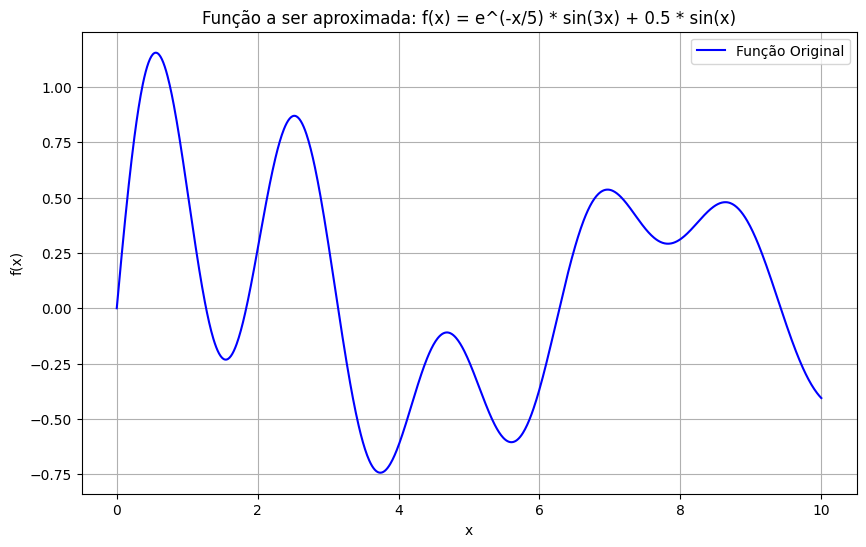

Intervalo de x: [0.0, 10.0]
Intervalo de f(x): [-0.7431, 1.1544]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função original a ser aproximada
def f(x):
    return np.exp(-x/5) * np.sin(3*x) + 0.5 * np.sin(x)

# Gerar conjunto de dados
x_train = np.linspace(0, 10, 1000)
y_train = f(x_train)

# Plotar a função original
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'b-', label='Função Original')
plt.title('Função a ser aproximada: f(x) = e^(-x/5) * sin(3x) + 0.5 * sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Intervalo de x: [{min(x_train)}, {max(x_train)}]")
print(f"Intervalo de f(x): [{min(y_train):.4f}, {max(y_train):.4f}]")

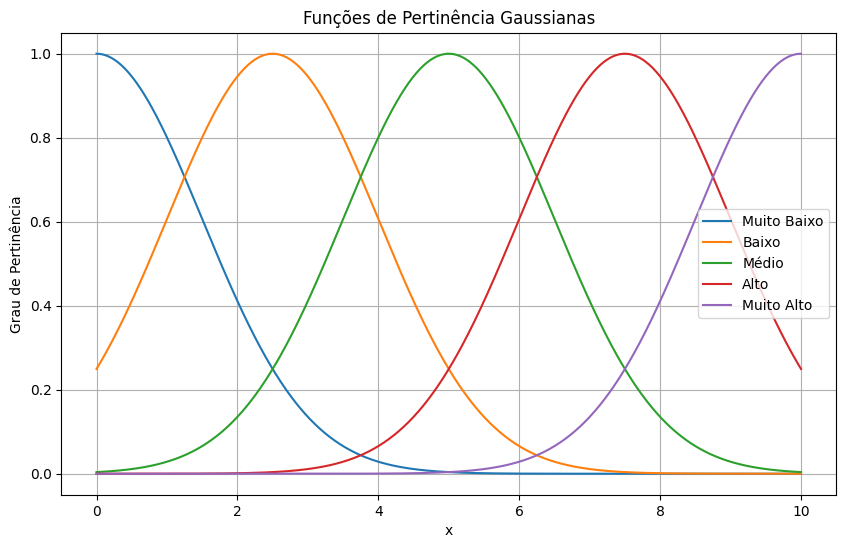

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função original a ser aproximada
def f(x):
    return np.exp(-x/5) * np.sin(3*x) + 0.5 * np.sin(x)

# Gerar conjunto de dados
x_train = np.linspace(0, 10, 1000)
y_train = f(x_train)

# Implementação do sistema fuzzy Takagi-Sugeno

# 1. Definir funções de pertinência triangulares
def triangular_mf(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# 2. Definir funções de pertinência gaussianas
def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean)**2) / (2 * sigma**2))

# Vamos definir 5 funções de pertinência gaussianas para cobrir o intervalo [0, 10]
def membership_degrees(x):
    # Parâmetros das funções de pertinência gaussianas
    means = [0, 2.5, 5, 7.5, 10]
    sigma = 1.5
    
    # Calcular graus de pertinência para cada regra
    mf_values = []
    for mean in means:
        mf_values.append(gaussian_mf(x, mean, sigma))
    
    return np.array(mf_values)

# Plotar as funções de pertinência
x_plot = np.linspace(0, 10, 1000)
mfs = membership_degrees(x_plot)

plt.figure(figsize=(10, 6))
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
for i, mf in enumerate(mfs):
    plt.plot(x_plot, mf, label=labels[i])
plt.title('Funções de Pertinência Gaussianas')
plt.xlabel('x')
plt.ylabel('Grau de Pertinência')
plt.grid(True)
plt.legend()
plt.show()

# Implementar Takagi-Sugeno de ordem zero (consequentes constantes)
# Inicialmente, vamos definir valores constantes para os consequentes
consequents_zero_order = np.array([1.0, 0.5, 0.0, -0.5, -0.7])

# Função para calcular a saída do sistema Takagi-Sugeno de ordem zero
def takagi_sugeno_zero_order(x, consequents):
    mf_values = membership_degrees(x)
    
    # Normalizar os pesos (para que a soma seja 1)
    weights_sum = np.sum(mf_values, axis=0)
    normalized_weights = mf_values / weights_sum
    
    # Calcular a saída ponderada
    output = np.sum(normalized_weights * consequents[:, np.newaxis], axis=0)
    
    return output

# Calcular a saída do sistema para os dados de treinamento
y_pred_zero = takagi_sugeno_zero_order(x_train, consequents_zero_order)

# Calcular o erro quadrático médio (MSE)
mse_zero = np.mean((y_train - y_pred_zero))

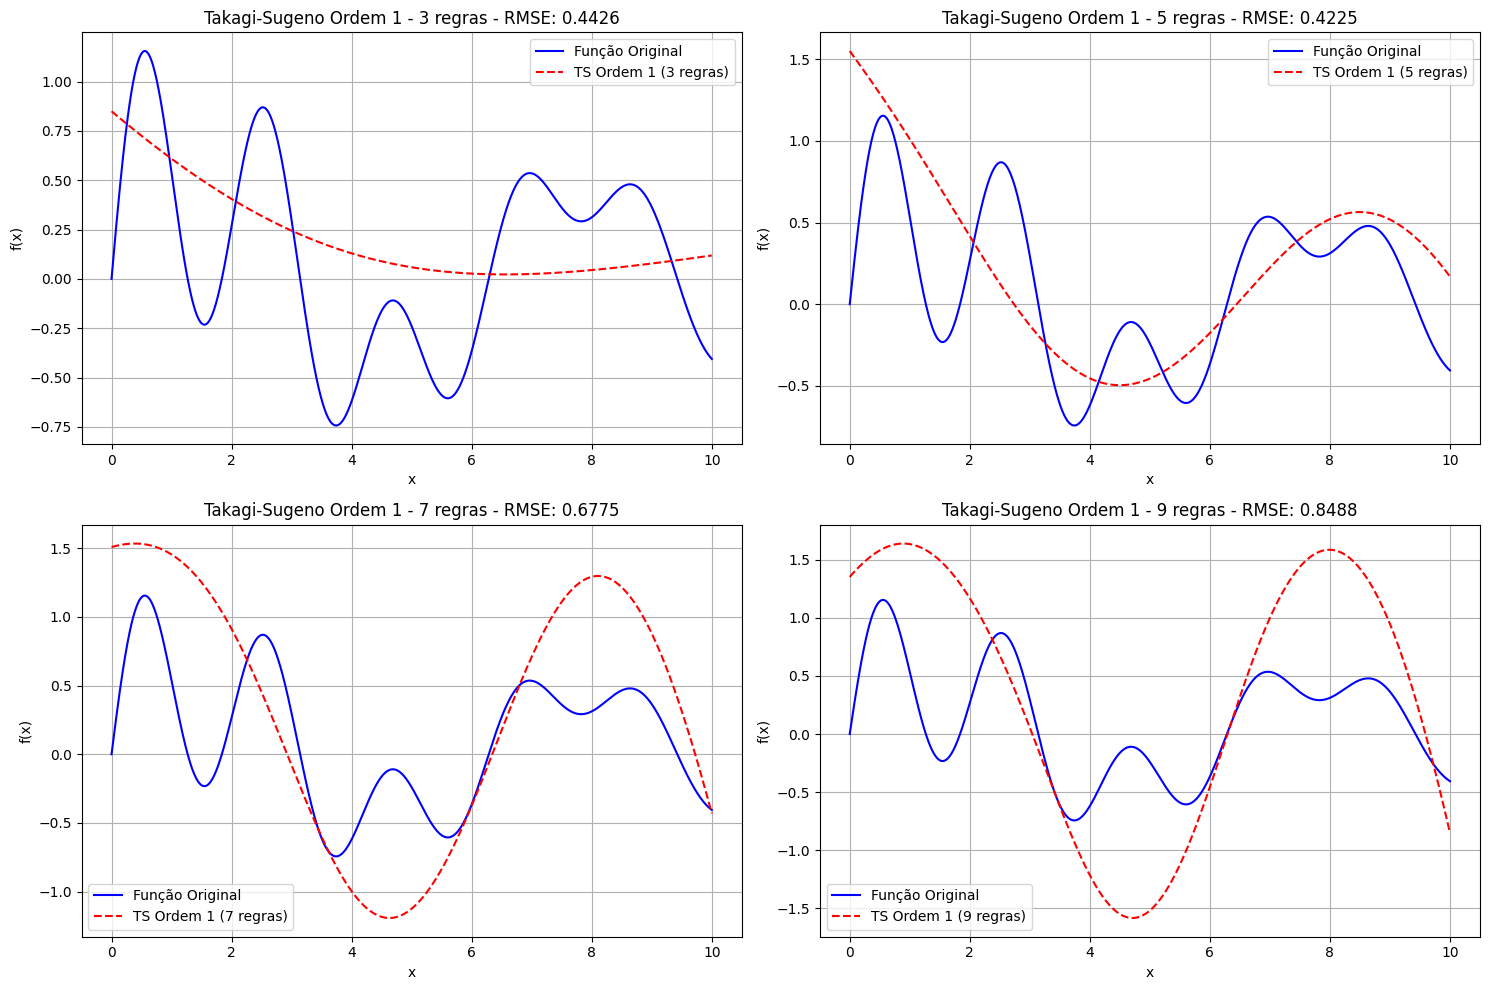

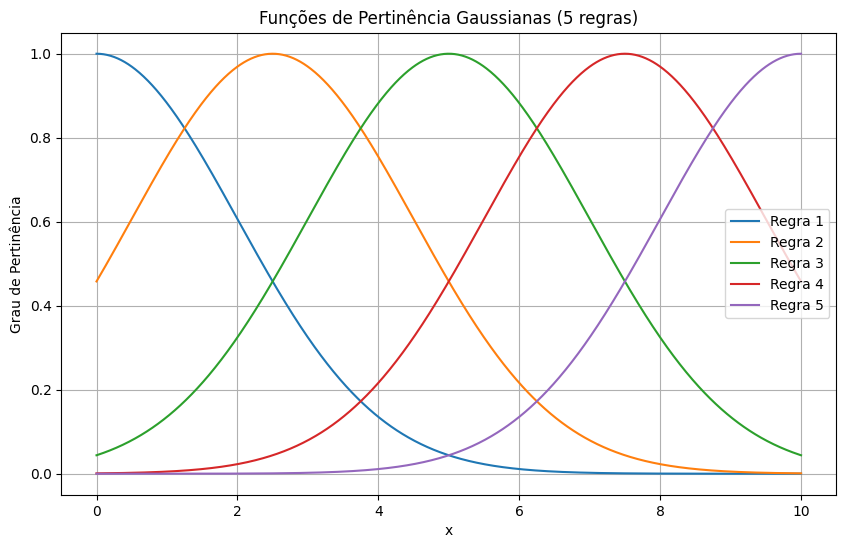

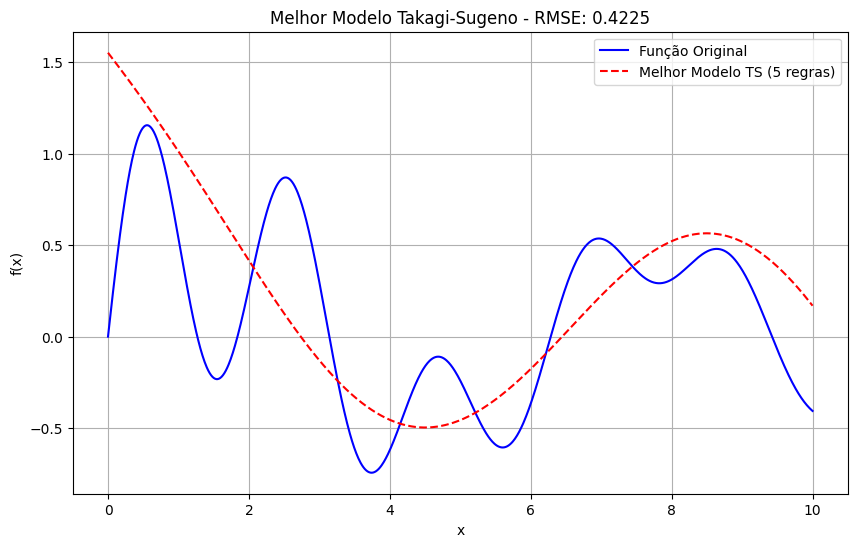

Melhor modelo: 5 regras com RMSE: 0.4225

Parâmetros dos consequentes (a, b para y = ax + b):
Regra 1: a = -0.4578, b = 1.4422
Regra 2: a = -0.6682, b = 1.9948
Regra 3: a = 0.0794, b = -0.5432
Regra 4: a = 0.3256, b = -2.1561
Regra 5: a = -0.6353, b = 6.0967

Comparação de RMSE:
Takagi-Sugeno Ordem Zero: 0.6351
Takagi-Sugeno Ordem Um (melhor): 0.4225
Melhoria: 33.48%


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função original a ser aproximada
def f(x):
    return np.exp(-x/5) * np.sin(3*x) + 0.5 * np.sin(x)

# Gerar conjunto de dados
x_train = np.linspace(0, 10, 1000)
y_train = f(x_train)

# Definir funções de pertinência gaussianas
def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean)**2) / (2 * sigma**2))

# Implementar sistema Takagi-Sugeno de primeira ordem
class TakagiSugenoFIS:
    def __init__(self, num_rules, x_range):
        self.num_rules = num_rules
        self.x_min, self.x_max = x_range
        
        # Distribuir os centros das funções de pertinência uniformemente
        self.centers = np.linspace(self.x_min, self.x_max, num_rules)
        
        # Definir sigma para as funções gaussianas
        range_x = self.x_max - self.x_min
        self.sigma = range_x / (num_rules - 1) * 0.8
        
        # Inicializar parâmetros dos consequentes (ordem 1: y = ax + b)
        # Para cada regra, temos [a, b]
        self.consequent_params = np.zeros((num_rules, 2))
    
    def membership_degrees(self, x):
        mf_values = np.zeros((self.num_rules, len(x)))
        for i in range(self.num_rules):
            mf_values[i] = gaussian_mf(x, self.centers[i], self.sigma)
        return mf_values
    
    def normalized_firing_strengths(self, x):
        mf_values = self.membership_degrees(x)
        # Soma dos graus de pertinência para cada x
        sum_mf = np.sum(mf_values, axis=0)
        # Normalizar para que a soma seja 1
        normalized_mf = mf_values / sum_mf
        return normalized_mf
    
    def predict(self, x):
        normalized_weights = self.normalized_firing_strengths(x)
        y_pred = np.zeros_like(x)
        
        for i in range(self.num_rules):
            # Consequente linear: y = ax + b
            a, b = self.consequent_params[i]
            y_i = a * x + b
            y_pred += normalized_weights[i] * y_i
        
        return y_pred
    
    def train_least_squares(self, x, y):
        """Treinar os parâmetros dos consequentes usando mínimos quadrados"""
        normalized_weights = self.normalized_firing_strengths(x)
        
        # Para cada regra, resolver um problema de mínimos quadrados
        for i in range(self.num_rules):
            # Matriz de design para a regra i
            X_design = np.column_stack((x * normalized_weights[i], normalized_weights[i]))
            
            # Resolver o sistema de equações normais
            XtX = X_design.T @ X_design
            Xty = X_design.T @ y
            
            # Adicionar regularização para evitar problemas de inversão
            reg = 1e-6 * np.eye(XtX.shape[0])
            
            # Calcular os parâmetros ótimos
            try:
                params = np.linalg.solve(XtX + reg, Xty)
                self.consequent_params[i] = params
            except np.linalg.LinAlgError:
                print(f"Erro na inversão da matriz para regra {i}. Usando pseudoinversa.")
                params = np.linalg.lstsq(X_design, y, rcond=None)[0]
                self.consequent_params[i] = params

# Testar diferentes números de regras
num_rules_list = [3, 5, 7, 9]
rmse_results = []

plt.figure(figsize=(15, 10))

for idx, num_rules in enumerate(num_rules_list):
    # Criar e treinar o sistema fuzzy
    fis = TakagiSugenoFIS(num_rules, [0, 10])
    fis.train_least_squares(x_train, y_train)
    
    # Fazer previsões
    y_pred = fis.predict(x_train)
    
    # Calcular RMSE
    mse = np.mean((y_train - y_pred)**2)
    rmse = np.sqrt(mse)
    rmse_results.append(rmse)
    
    # Plotar resultados
    plt.subplot(2, 2, idx+1)
    plt.plot(x_train, y_train, 'b-', label='Função Original')
    plt.plot(x_train, y_pred, 'r--', label=f'TS Ordem 1 ({num_rules} regras)')
    plt.title(f'Takagi-Sugeno Ordem 1 - {num_rules} regras - RMSE: {rmse:.4f}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotar as funções de pertinência do melhor modelo
best_idx = np.argmin(rmse_results)
best_num_rules = num_rules_list[best_idx]
best_fis = TakagiSugenoFIS(best_num_rules, [0, 10])
best_fis.train_least_squares(x_train, y_train)

# Plotar funções de pertinência
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 10, 1000)
mfs = best_fis.membership_degrees(x_plot)

for i in range(best_num_rules):
    plt.plot(x_plot, mfs[i], label=f'Regra {i+1}')
plt.title(f'Funções de Pertinência Gaussianas ({best_num_rules} regras)')
plt.xlabel('x')
plt.ylabel('Grau de Pertinência')
plt.grid(True)
plt.legend()
plt.show()

# Plotar o melhor modelo
y_pred_best = best_fis.predict(x_train)
rmse_best = np.sqrt(np.mean((y_train - y_pred_best)**2))

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'b-', label='Função Original')
plt.plot(x_train, y_pred_best, 'r--', label=f'Melhor Modelo TS ({best_num_rules} regras)')
plt.title(f'Melhor Modelo Takagi-Sugeno - RMSE: {rmse_best:.4f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar os parâmetros do consequente para o melhor modelo
print(f"Melhor modelo: {best_num_rules} regras com RMSE: {rmse_best:.4f}")
print("\nParâmetros dos consequentes (a, b para y = ax + b):")
for i in range(best_num_rules):
    print(f"Regra {i+1}: a = {best_fis.consequent_params[i,0]:.4f}, b = {best_fis.consequent_params[i,1]:.4f}")

# Comparar com o modelo de ordem zero
print("\nComparação de RMSE:")
print(f"Takagi-Sugeno Ordem Zero: 0.6351")
print(f"Takagi-Sugeno Ordem Um (melhor): {rmse_best:.4f}")
print(f"Melhoria: {(0.6351 - rmse_best) / 0.6351 * 100:.2f}%")

Modelo com 15 regras - RMSE após otimização: 0.035143
Modelo com 20 regras - RMSE após otimização: 0.030203
Modelo com 25 regras - RMSE após otimização: 0.026467
Modelo com 30 regras - RMSE após otimização: 0.027167
Modelo com 35 regras - RMSE após otimização: 0.029824
Modelo com 40 regras - RMSE após otimização: 0.035168
Modelo com 45 regras - RMSE após otimização: 0.042200
Modelo com 50 regras - RMSE após otimização: 0.051358


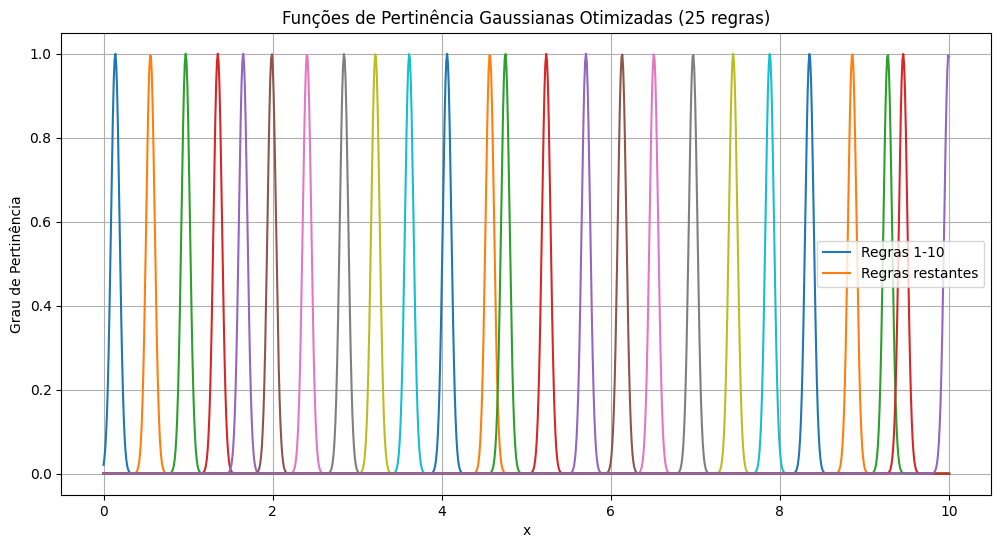

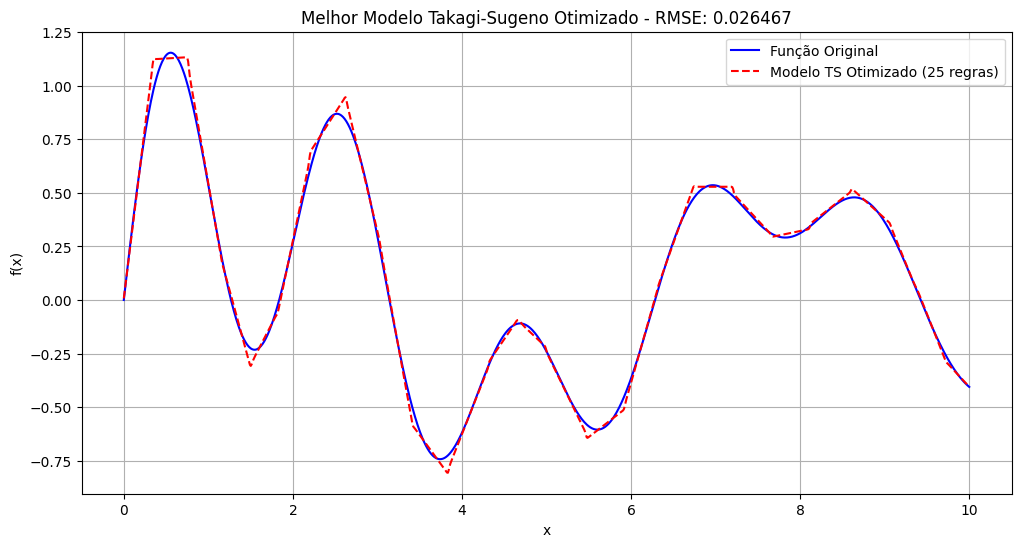

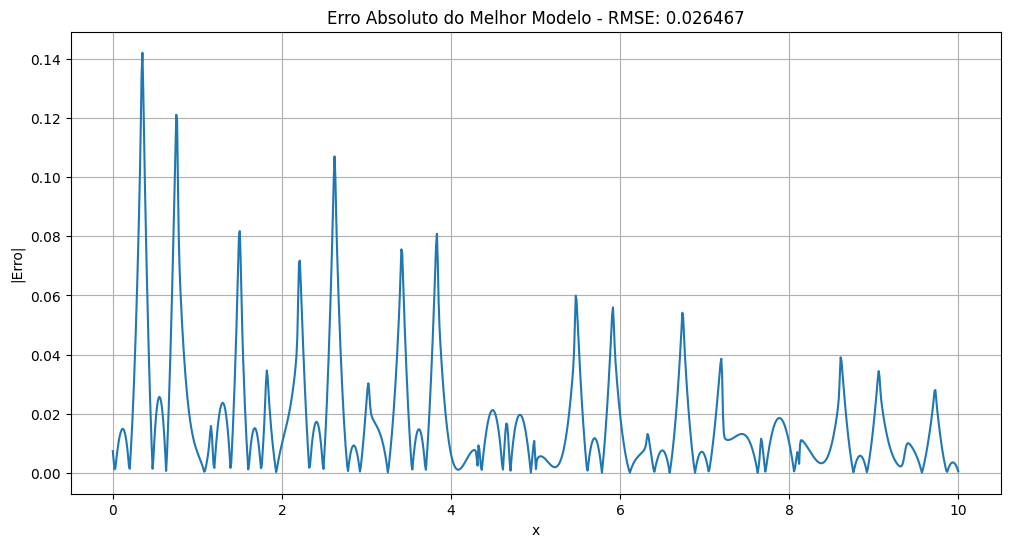


Melhor modelo: 25 regras com RMSE: 0.026467
Sigma otimizado: 0.050000

Pontos com erro > 0.01:
x = 0.0701, erro = 0.010644
x = 0.0801, erro = 0.012208
x = 0.0901, erro = 0.013443
x = 0.1001, erro = 0.014323
x = 0.1101, erro = 0.014826
x = 0.1201, erro = 0.014928
x = 0.1301, erro = 0.014604
x = 0.1401, erro = 0.013833
x = 0.1502, erro = 0.012592
x = 0.1602, erro = 0.010859
x = 0.2202, erro = 0.011020
x = 0.2302, erro = 0.016760
x = 0.2402, erro = 0.023147
x = 0.2503, erro = 0.030196
x = 0.2603, erro = 0.037924
x = 0.2703, erro = 0.046346
x = 0.2803, erro = 0.055478
x = 0.2903, erro = 0.065342
x = 0.3003, erro = 0.075983
x = 0.3103, erro = 0.087541
x = 0.3203, erro = 0.100501
x = 0.3303, erro = 0.116148
x = 0.3403, erro = 0.134492
x = 0.3504, erro = 0.142049
x = 0.3604, erro = 0.129464
x = 0.3704, erro = 0.112346
x = 0.3804, erro = 0.096781
x = 0.3904, erro = 0.082620
x = 0.4004, erro = 0.069478
x = 0.4104, erro = 0.057220
x = 0.4204, erro = 0.045811
x = 0.4304, erro = 0.035245
x = 0.44

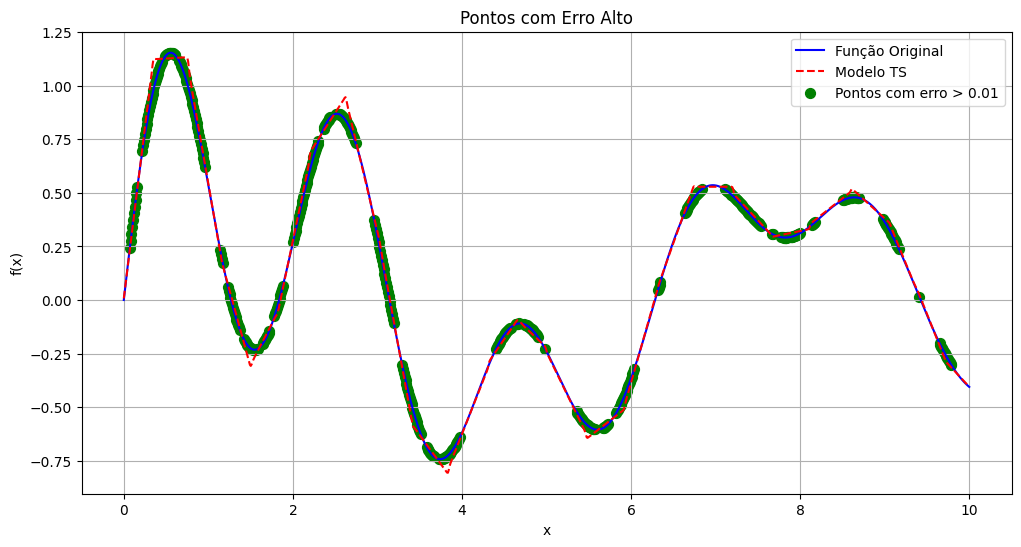


Estatísticas do erro:
Erro médio: 0.017256
Erro máximo: 0.142049
Erro mínimo: 0.000074
Desvio padrão do erro: 0.020068


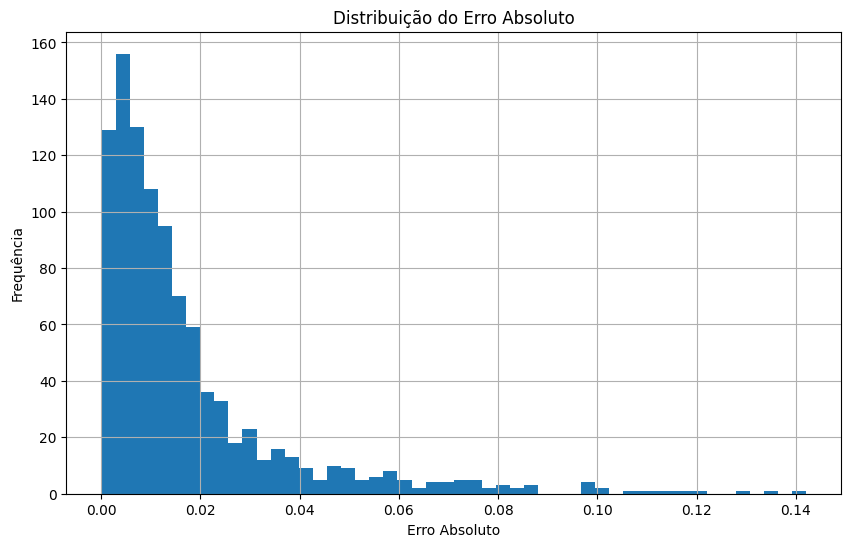

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Função original a ser aproximada
def f(x):
    return np.exp(-x/5) * np.sin(3*x) + 0.5 * np.sin(x)

# Gerar conjunto de dados
x_train = np.linspace(0, 10, 1000)
y_train = f(x_train)

# Definir funções de pertinência gaussianas
def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean)**2) / (2 * sigma**2))

# Implementar sistema Takagi-Sugeno de primeira ordem com otimização avançada
class TakagiSugenoFIS:
    def __init__(self, num_rules, x_range):
        self.num_rules = num_rules
        self.x_min, self.x_max = x_range
        
        # Distribuir os centros das funções de pertinência uniformemente
        self.centers = np.linspace(self.x_min, self.x_max, num_rules)
        
        # Definir sigma para as funções gaussianas
        range_x = self.x_max - self.x_min
        if num_rules == 1:
            self.sigma = range_x * 0.5  # Valor arbitrário para o caso de uma única regra
        else:
            self.sigma = range_x / (num_rules - 1) * 0.8
        
        # Inicializar parâmetros dos consequentes (ordem 1: y = ax + b)
        # Para cada regra, temos [a, b]
        self.consequent_params = np.zeros((num_rules, 2))
    
    def membership_degrees(self, x):
        mf_values = np.zeros((self.num_rules, len(x) if hasattr(x, "__len__") else 1))
        for i in range(self.num_rules):
            mf_values[i] = gaussian_mf(x, self.centers[i], self.sigma)
        return mf_values
    
    def normalized_firing_strengths(self, x):
        mf_values = self.membership_degrees(x)
        # Soma dos graus de pertinência para cada x
        sum_mf = np.sum(mf_values, axis=0)
        # Normalizar para que a soma seja 1
        normalized_mf = mf_values / sum_mf
        return normalized_mf
    
    def predict(self, x):
        x_array = np.array(x)
        if x_array.ndim == 0:
            x_array = np.array([x_array])
            
        normalized_weights = self.normalized_firing_strengths(x_array)
        y_pred = np.zeros_like(x_array, dtype=float)
        
        for i in range(self.num_rules):
            # Consequente linear: y = ax + b
            a, b = self.consequent_params[i]
            y_i = a * x_array + b
            y_pred += normalized_weights[i] * y_i
        
        return y_pred
    
    def train_least_squares(self, x, y):
        """Treinar os parâmetros dos consequentes usando mínimos quadrados"""
        normalized_weights = self.normalized_firing_strengths(x)
        
        # Para cada regra, resolver um problema de mínimos quadrados
        for i in range(self.num_rules):
            # Matriz de design para a regra i
            X_design = np.column_stack((x * normalized_weights[i], normalized_weights[i]))
            
            # Resolver o sistema de equações normais
            XtX = X_design.T @ X_design
            Xty = X_design.T @ y
            
            # Adicionar regularização para evitar problemas de inversão
            reg = 1e-6 * np.eye(XtX.shape[0])
            
            # Calcular os parâmetros ótimos
            try:
                params = np.linalg.solve(XtX + reg, Xty)
                self.consequent_params[i] = params
            except np.linalg.LinAlgError:
                print(f"Erro na inversão da matriz para regra {i}. Usando pseudoinversa.")
                params = np.linalg.lstsq(X_design, y, rcond=None)[0]
                self.consequent_params[i] = params
    
    def optimize_mf_parameters(self, x, y, max_iter=1000):
        """Otimizar os parâmetros das funções de pertinência"""
        # Parâmetros iniciais: centros e sigma
        initial_params = np.concatenate([self.centers, [self.sigma]])
        
        # Função objetivo: RMSE
        def objective(params):
            # Atualizar parâmetros
            centers = params[:self.num_rules]
            sigma = params[-1]
            
            # Verificar se os centros estão ordenados e dentro do intervalo
            if not np.all(np.diff(centers) > 0) or np.any(centers < self.x_min) or np.any(centers > self.x_max):
                return 1e10  # Penalidade alta
            
            # Verificar se sigma é positivo e razoável
            if sigma <= 0 or sigma > (self.x_max - self.x_min):
                return 1e10  # Penalidade alta
            
            # Salvar parâmetros atuais
            old_centers = self.centers.copy()
            old_sigma = self.sigma
            
            # Atualizar parâmetros
            self.centers = centers
            self.sigma = sigma
            
            # Treinar consequentes
            self.train_least_squares(x, y)
            
            # Calcular erro
            y_pred = self.predict(x)
            mse = np.mean((y - y_pred)**2)
            
            # Restaurar parâmetros originais
            self.centers = old_centers
            self.sigma = old_sigma
            
            return np.sqrt(mse)
        
        # Restrições: centros ordenados e dentro do intervalo
        bounds = [(self.x_min, self.x_max) for _ in range(self.num_rules)]
        bounds.append((0.05, self.x_max - self.x_min))  # Limites para sigma (reduzido o mínimo)
        
        # Otimização
        result = minimize(objective, initial_params, method='L-BFGS-B', bounds=bounds, options={'maxiter': max_iter})
        
        # Atualizar parâmetros com os valores otimizados
        if result.success:
            self.centers = result.x[:self.num_rules]
            self.sigma = result.x[-1]
            # Treinar consequentes com os novos parâmetros
            self.train_least_squares(x, y)
        else:
            print("Aviso: A otimização não convergiu completamente.")
        
        return result.fun  # Retornar o RMSE final

# Testar diferentes números de regras com otimização avançada
num_rules_list = [15, 20, 25, 30, 35]  # Aumentei o número de regras
rmse_results = []
models = []

for num_rules in num_rules_list:
    # Criar e treinar o sistema fuzzy
    fis = TakagiSugenoFIS(num_rules, [0, 10])
    
    # Treinar primeiro com mínimos quadrados
    fis.train_least_squares(x_train, y_train)
    
    # Otimizar parâmetros das funções de pertinência
    rmse = fis.optimize_mf_parameters(x_train, y_train, max_iter=2000)  # Aumentei o número de iterações
    
    rmse_results.append(rmse)
    models.append(fis)
    
    print(f"Modelo com {num_rules} regras - RMSE após otimização: {rmse:.6f}")

# Encontrar o melhor modelo
best_idx = np.argmin(rmse_results)
best_num_rules = num_rules_list[best_idx]
best_fis = models[best_idx]
best_rmse = rmse_results[best_idx]

# Plotar as funções de pertinência do melhor modelo
plt.figure(figsize=(12, 6))
x_plot = np.linspace(0, 10, 1000)
mfs = best_fis.membership_degrees(x_plot)

for i in range(best_num_rules):
    plt.plot(x_plot, mfs[i], label=f'Regra {i+1}' if i < 10 else None)  # Limitar legendas
plt.title(f'Funções de Pertinência Gaussianas Otimizadas ({best_num_rules} regras)')
plt.xlabel('x')
plt.ylabel('Grau de Pertinência')
plt.grid(True)
if best_num_rules <= 10:
    plt.legend()
else:
    plt.legend(['Regras 1-10', 'Regras restantes'])
plt.show()

# Plotar o melhor modelo
y_pred_best = best_fis.predict(x_train)
rmse_best = np.sqrt(np.mean((y_train - y_pred_best)**2))

plt.figure(figsize=(12, 6))
plt.plot(x_train, y_train, 'b-', label='Função Original')
plt.plot(x_train, y_pred_best, 'r--', label=f'Modelo TS Otimizado ({best_num_rules} regras)')
plt.title(f'Melhor Modelo Takagi-Sugeno Otimizado - RMSE: {rmse_best:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# Plotar o erro absoluto
plt.figure(figsize=(12, 6))
error = np.abs(y_train - y_pred_best)
plt.plot(x_train, error)
plt.title(f'Erro Absoluto do Melhor Modelo - RMSE: {rmse_best:.6f}')
plt.xlabel('x')
plt.ylabel('|Erro|')
plt.grid(True)
plt.show()

# Mostrar os parâmetros do consequente para o melhor modelo
print(f"\nMelhor modelo: {best_num_rules} regras com RMSE: {rmse_best:.6f}")
print(f"Sigma otimizado: {best_fis.sigma:.6f}")

# Verificar se há algum ponto com erro maior que um limiar
error_threshold = 0.01
high_error_points = np.where(error > error_threshold)[0]
if len(high_error_points) > 0:
    print(f"\nPontos com erro > {error_threshold}:")
    for idx in high_error_points:
        print(f"x = {x_train[idx]:.4f}, erro = {error[idx]:.6f}")
    
    # Plotar os pontos de alto erro
    plt.figure(figsize=(12, 6))
    plt.plot(x_train, y_train, 'b-', label='Função Original')
    plt.plot(x_train, y_pred_best, 'r--', label=f'Modelo TS')
    plt.scatter(x_train[high_error_points], y_train[high_error_points], color='g', s=50, 
                label=f'Pontos com erro > {error_threshold}')
    plt.title('Pontos com Erro Alto')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print(f"\nNenhum ponto com erro > {error_threshold}")

# Estatísticas do erro
print("\nEstatísticas do erro:")
print(f"Erro médio: {np.mean(error):.6f}")
print(f"Erro máximo: {np.max(error):.6f}")
print(f"Erro mínimo: {np.min(error):.6f}")
print(f"Desvio padrão do erro: {np.std(error):.6f}")

# Histograma do erro
plt.figure(figsize=(10, 6))
plt.hist(error, bins=50)
plt.title('Distribuição do Erro Absoluto')
plt.xlabel('Erro Absoluto')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()